# Quantum Arithmetic Logic Units
<i>by Ali Hakim Taşkıran<i/>

As we perform quantum operations in a quantum computer, we need to use classical logic operations. This is so challenging. Alignment of gates in the given order increases the risk of error. By the way, thanks to QALU, you will add ultra complex operators only using one function

### Imports

In [1]:
from qiskit import QuantumCircuit,execute,Aer,QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_state_qsphere,plot_bloch_multivector
from math import log
import numpy as np

## Simulation Environment

In [2]:
be=Aer.get_backend("statevector_simulator")

## AND Gate

In [3]:
def and_(circ,a,b,out):
    circ.ccx(a,b,out)

## OR Gate

In [4]:
def or_(circ,a,b,out):
    circ.cx(a,out)
    circ.cx(b,out)
    circ.ccx(a,b,out)

## XOR Gate

In [5]:
def xor_(circ,a,b,out):
    circ.cx(a,out)
    circ.cx(b,out)

## NAND Gate

In [6]:
def nand_(circ,a,b,out):
    circ.ccx(a,b,out)
    circ.x(out)

## NOR Gate

In [7]:
def nor_(circ,a,b,out):
    circ.cx(a,out)
    circ.cx(b,out)
    circ.ccx(a,b,out)
    circ.x(out)

## XNOR Gate

In [8]:
def xnor_(circ,a,b,out):
    circ.cx(a,out)
    circ.cx(b,out)
    circ.x(out)

## Visualize the gates

'AND'

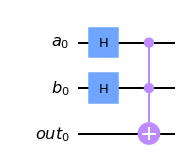

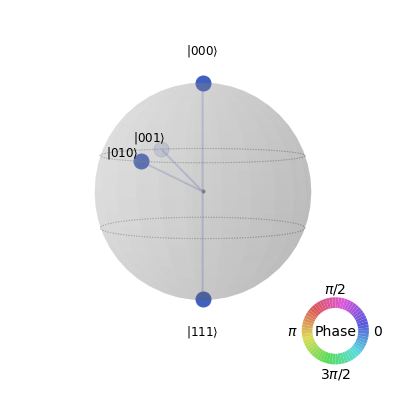

'NAND'

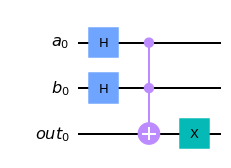

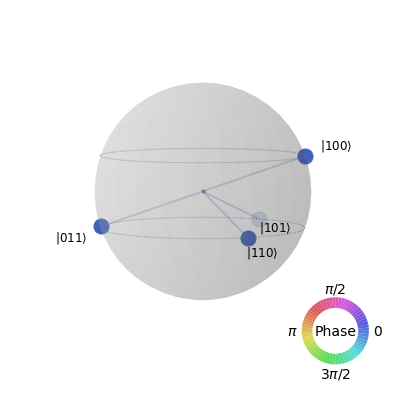

'OR'

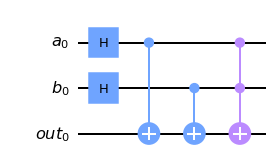

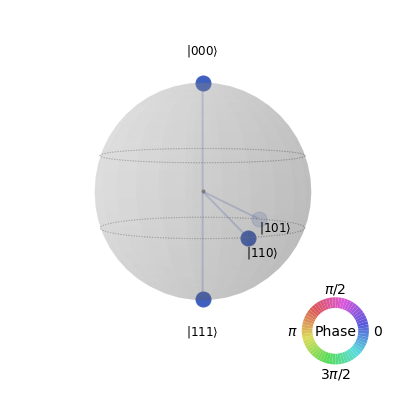

'NOR'

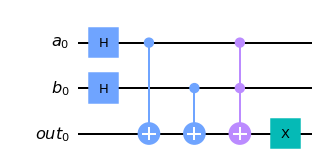

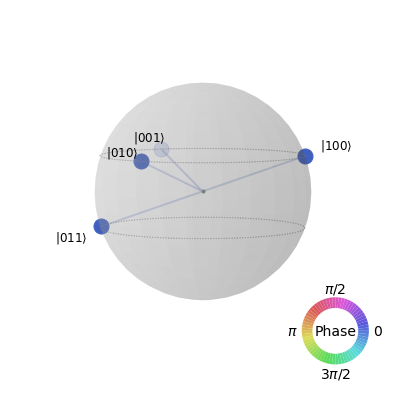

'XOR'

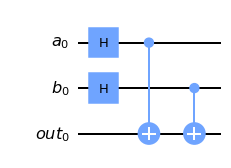

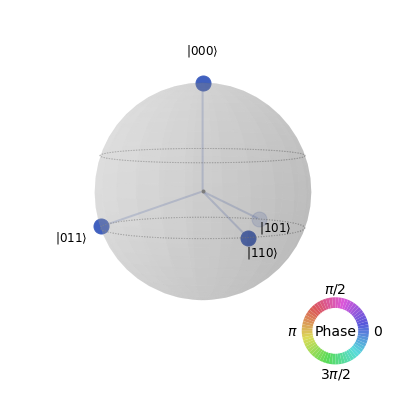

'XNOR'

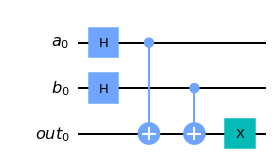

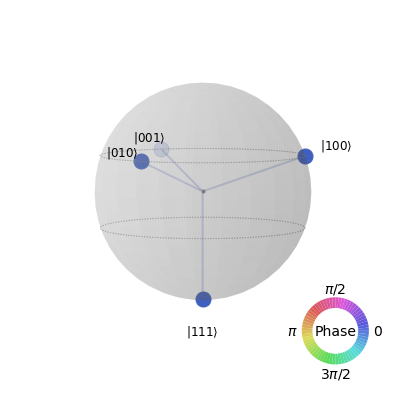

In [9]:
a=QuantumRegister(1,"a")
b=QuantumRegister(1,"b")
c=QuantumRegister(1,"out")

qc=QuantumCircuit(a,b,c)
qc.h(0)
qc.h(1)
and_(qc,0,1,2)
display("AND",qc.draw("mpl"))
display(plot_state_qsphere(execute(qc,be).result().get_statevector()))

a=QuantumRegister(1,"a")
b=QuantumRegister(1,"b")
c=QuantumRegister(1,"out")

qc=QuantumCircuit(a,b,c)
qc.h(0)
qc.h(1)
nand_(qc,0,1,2)
display("NAND",qc.draw("mpl"))
display(plot_state_qsphere(execute(qc,be).result().get_statevector()))

a=QuantumRegister(1,"a")
b=QuantumRegister(1,"b")
c=QuantumRegister(1,"out")

qc=QuantumCircuit(a,b,c)
qc.h(0)
qc.h(1)
or_(qc,0,1,2)
display("OR",qc.draw("mpl"))
display(plot_state_qsphere(execute(qc,be).result().get_statevector()))

a=QuantumRegister(1,"a")
b=QuantumRegister(1,"b")
c=QuantumRegister(1,"out")

qc=QuantumCircuit(a,b,c)
qc.h(0)
qc.h(1)
nor_(qc,0,1,2)
display("NOR",qc.draw("mpl"))
display(plot_state_qsphere(execute(qc,be).result().get_statevector()))

a=QuantumRegister(1,"a")
b=QuantumRegister(1,"b")
c=QuantumRegister(1,"out")

qc=QuantumCircuit(a,b,c)
qc.h(0)
qc.h(1)
xor_(qc,0,1,2)
display("XOR",qc.draw("mpl"))
display(plot_state_qsphere(execute(qc,be).result().get_statevector()))

a=QuantumRegister(1,"a")
b=QuantumRegister(1,"b")
c=QuantumRegister(1,"out")

qc=QuantumCircuit(a,b,c)
qc.h(0)
qc.h(1)
xnor_(qc,0,1,2)
display("XNOR",qc.draw("mpl"))
display(plot_state_qsphere(execute(qc,be).result().get_statevector()))

## Arithmetic Operators
## Half Adder
**circ** is the QuantumCircuit that you add adder on it. **a**,**b** are inputs, **carry** is carry out and **sum_** is sum of **a+b**. You will feed **a**,**b**, **carry**, **out** variables with number of the spesific qubits.

In [10]:
def half_adder(circ, a, b, carry,sum_):
    xor_(circ,a,b,sum_)
    and_(circ,a,b,carry)

## Full Adder

**circ** is the QuantumCircuit that you add adder on it. **a**,**b** are inputs, **c_in** is carry in, **c_out** is carry out and **out** is the sum. You will feed **a**,**b**, **c_in**, **c_out**,**t_0**, **t_1**, **t_2** variables with number of the spesific qubits.
**t_0**, **t_1** and **t_2** are temporary used qubits for computation. They don't represent any result but it's necessary for operations.

In [11]:
def full_adder(circ,a,b,c_in,c_out,sum_):
    qc.cx(a,sum_)
    qc.cx(b,sum_)
    qc.cx(c_in,sum_)
    qc.ccx(a,b,c_out)
    qc.ccx(b,c_in,c_out)
    qc.ccx(c_in,a,c_out)

## Half Subtractor

**circ** is the QuantumCircuit that you add adder on it. **a**,**b** are inputs, **bor** is borrow out,  and **diff** is difference of **a-b** . You will feed **a**,**b**, **bor**, **out** variables with number of the spesific qubits.

In [12]:
def half_subtractor(circ, a, b, bor, diff):
    xor_(circ,a,b,diff)
    circ.ccx(b,diff,bor)

## Full Subtractor
**circ** is the QuantumCircuit that you add adder on it. **a**,**b** are inputs, **c_in** is carry in, **c_out** is carry out and **out** is the sum. You will feed **a**,**b**, **c_in**, **c_out**,**t_0**, **t_1**, **t_2** variables with number of the spesific qubits.
**t_0**, **t_1** and **t_2** are temporary used qubits for computation. They don't represent any result but it's necessary for operations.

In [13]:
def full_subtractor(circ,a,b,b_in,b_out,diff):
    qc.cx(a,diff)
    qc.cx(b,diff)
    qc.cx(b_in,diff)
    qc.x(a)
    qc.ccx(b_in,a,b_out)
    qc.ccx(b_in,b,b_out)
    qc.ccx(a,b,b_out)
    qc.x(a)

## Visualize Arithmetic Operations

'HALF ADDER'

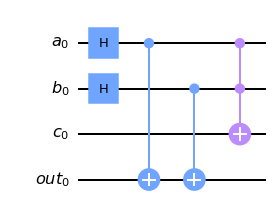

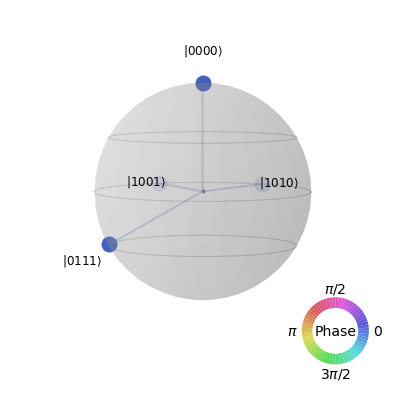

'FULL ADDER'

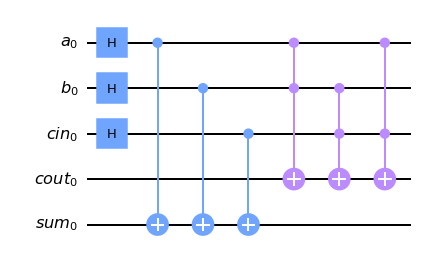

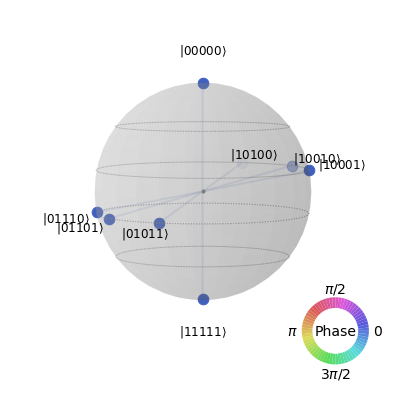

'HALF SUBTRACTOR'

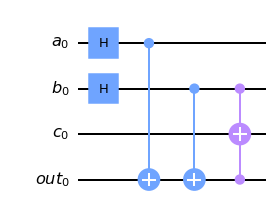

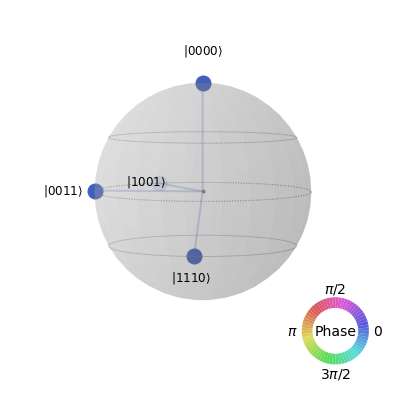

'FULL SUBTRACTOR'

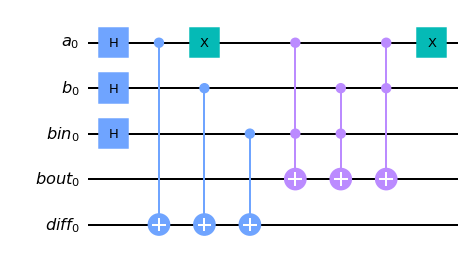

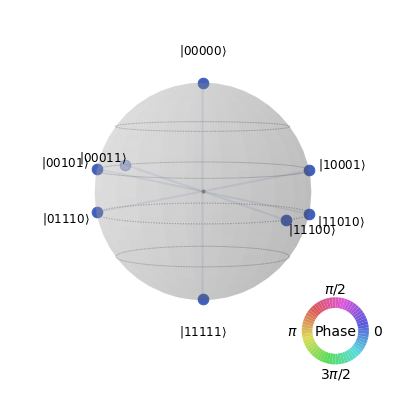

In [14]:
a=QuantumRegister(1,"a")
b=QuantumRegister(1,"b")
c=QuantumRegister(1,"c")
out=QuantumRegister(1,"out")

qc=QuantumCircuit(a,b,c,out)
qc.h(0)
qc.h(1)

half_adder(qc,0,1,2,3)
display("HALF ADDER",qc.draw("mpl"))
display(plot_state_qsphere(execute(qc,be).result().get_statevector()))


a=QuantumRegister(1,"a")
b=QuantumRegister(1,"b")
c_in=QuantumRegister(1,"cin")
c_out=QuantumRegister(1,"cout")
sum_=QuantumRegister(1,"sum")

qc=QuantumCircuit(a,b,c_in,c_out,sum_)
qc.h(0)
qc.h(1)
qc.h(2)

full_adder(qc,0,1,2,3,4)
display("FULL ADDER",qc.draw("mpl"))
display(plot_state_qsphere(execute(qc,be).result().get_statevector()))


a=QuantumRegister(1,"a")
b=QuantumRegister(1,"b")
c=QuantumRegister(1,"c")
out=QuantumRegister(1,"out")

qc=QuantumCircuit(a,b,c,out)
qc.h(0)
qc.h(1)

half_subtractor(qc,0,1,2,3)
display("HALF SUBTRACTOR",qc.draw("mpl"))
display(plot_state_qsphere(execute(qc,be).result().get_statevector()))


a=QuantumRegister(1,"a")
b=QuantumRegister(1,"b")
b_in=QuantumRegister(1,"bin")
b_out=QuantumRegister(1,"bout")
diff=QuantumRegister(1,"diff")

qc=QuantumCircuit(a,b,b_in,b_out,diff)
qc.h(0)
qc.h(1)
qc.h(2)

full_subtractor(qc,0,1,2,3,4)
display("FULL SUBTRACTOR",qc.draw("mpl"))
display(plot_state_qsphere(execute(qc,be).result().get_statevector()))

## Multi Qubits Adder
  **circ** is quantum circuit that you want to add adder circuit. **A** is tuple or list of qubits of first element that will be added. **B** is tuple or list of qubits of second one. **T** is list or tuple of temporary qubits. It has one less element than A and B. **C** is tuple or list of qubits of sum. C has one more element than A and B

In [15]:
def multi_qubits_adder(circ,A,B,T,C):
    if not (type(A)==tuple or type(A)==list):
        raise TypeError("A must be a tuple or list")
    if not (type(B)==tuple or type(B)==list):
        raise TypeError("B must be a tuple or list")
    if not (type(T)==tuple or type(T)==list):
        raise TypeError("T must be a tuple or list")
    if not (type(C)==tuple or type(C)==list):
        raise TypeError("C must be a tuple or list")
    if not len(A)==len(B):
        raise ValueError("# of qubits of A and B must be equal")
    if not len(A)+1==len(C):
        raise ValueError("C must has one more qubit than A and B")
    if not len(A)-1==len(T):
        raise ValueError("T must has one more less qubit than A and B")
    A=tuple(A)
    B=tuple(B)
    T=tuple(T)
    C=tuple(C)
    if len(set(A+B+T+C))<len(A+B+T+C):
        raise ValueError("Qubits must not coindice")
        
    half_adder(circ,A[0],B[0],T[0],C[0])
    for i in range(1,len(A)-1):
        full_adder(circ,A[i],B[i],T[i-1],T[i],C[i])
    full_adder(circ,A[-1],B[-1],T[-1],C[-1],C[-2])

## Multi Qubits Subtractor
  **circ** is quantum circuit that you want to add subtractor circuit. **A** is tuple or list of qubits of first element that will be subtracted. **B** is tuple or list of qubits of second one. **T** is list or tuple of temporary qubits. It has one less element than A and B. **C** is tuple or list of qubits of subtraction. C has one more element than A and B. It returns **A-B**

In [16]:
def multi_qubits_subtractor(circ,A,B,T,C):
    if not (type(A)==tuple or type(A)==list):
        raise TypeError("A must be a tuple or list")
    if not (type(B)==tuple or type(B)==list):
        raise TypeError("B must be a tuple or list")
    if not (type(T)==tuple or type(T)==list):
        raise TypeError("T must be a tuple or list")
    if not (type(C)==tuple or type(C)==list):
        raise TypeError("C must be a tuple or list")
    if not len(A)==len(B):
        raise ValueError("# of qubits of A and B must be equal")
    if not len(A)+1==len(C):
        raise ValueError("C must has one more qubit than A and B")
    if not len(A)-1==len(T):
        raise ValueError("T must has one more less qubit than A and B")
    A=tuple(A)
    B=tuple(B)
    T=tuple(T)
    C=tuple(C)
    if len(set(A+B+T+C))<len(A+B+T+C):
        raise ValueError("Qubits must not coindice")

    half_subtractor(circ,A[0],B[0],T[0],C[0])
    for i in range(1,len(A)-1):
        full_subtractor(circ,A[i],B[i],T[i-1],T[i],C[i])
    full_subtractor(circ,A[-1],B[-1],T[-1],C[-1],C[-2])


### Testing Multi Qubits Adder

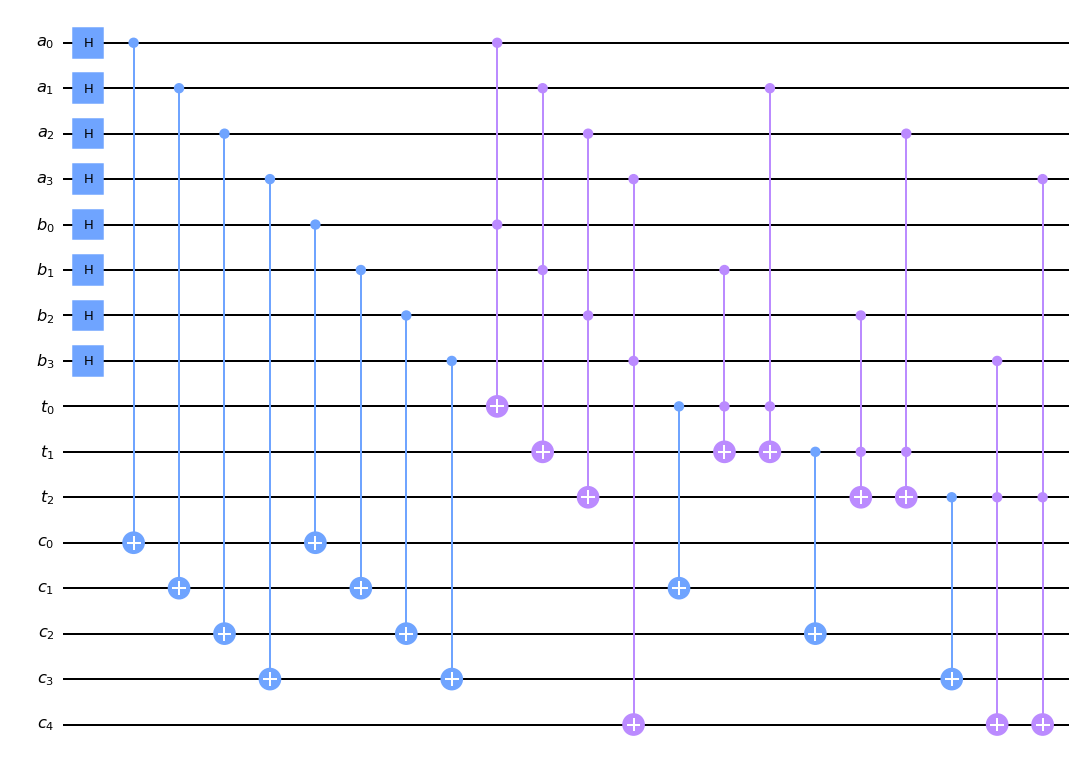

# of performed simultaneously operations is 256


[['0000000000000000', 0.003906250000000007, '00000-000-0000-0000', '0=0+0'],
 ['0000100000000001', 0.003906250000000005, '00001-000-0000-0001', '1=0+1'],
 ['0000100000010000', 0.003906250000000005, '00001-000-0001-0000', '1=1+0'],
 ['0001000000000010', 0.003906250000000005, '00010-000-0000-0010', '2=0+2'],
 ['0001000000100000', 0.003906250000000005, '00010-000-0010-0000', '2=2+0'],
 ['0001000100010001', 0.0039062500000000035, '00010-001-0001-0001', '2=1+1'],
 ['0001100000000011', 0.0039062500000000035, '00011-000-0000-0011', '3=0+3'],
 ['0001100000010010', 0.0039062500000000035, '00011-000-0001-0010', '3=1+2'],
 ['0001100000100001', 0.0039062500000000035, '00011-000-0010-0001', '3=2+1'],
 ['0001100000110000', 0.0039062500000000035, '00011-000-0011-0000', '3=3+0'],
 ['0010000000000100', 0.003906250000000005, '00100-000-0000-0100', '4=0+4'],
 ['0010000001000000', 0.003906250000000005, '00100-000-0100-0000', '4=4+0'],
 ['0010001000100010', 0.0039062500000000035, '00100-010-0010-0010', '4=

In [17]:
#Function for extracting addition operations from statevector
def extract(sv,q,t):#sv:statevector, q: # of qubits, t:number of temporaries
    probs=[]
    for i in range(len(sv)):
        if not sv[i]==0:
            probs.append([i,abs(sv[i])**2])
    for i in range(len(probs)):
        probs[i][0]=bin(probs[i][0])[2:]
        probs[i][0]="0"*(3*q+1+t-len((probs[i][0])))+probs[i][0]
    
    for i in range(len(probs)):
        probs[i].append(probs[i][0][:q+1]+"-"+probs[i][0][q+1:t+q+1]+"-"+probs[i][0][q+t+1:2*q+t+1]+"-"+probs[i][0][2*q+t+1:3*q+t+1])
    for i in range(len(probs)):
        m=""
        t=probs[i][2].split("-")
        m+=str(int(t[0],2))+"="+str(int(t[2],2))+"+"+str(int(t[3],2))
        probs[i].append(m)
            
    return probs

a=QuantumRegister(4,"a")
b=QuantumRegister(4,"b")
t=QuantumRegister(3,"t")
c=QuantumRegister(5,"c")
qc=QuantumCircuit(a,b,t,c)
qc.h([i for i in range(8)])
multi_qubits_adder(qc,(0,1,2,3),(4,5,6,7),(8,9,10),(11,12,13,14,15))
display(qc.draw("mpl"))
sv=execute(qc,be).result().get_statevector()
n=extract(sv,4,3)
print("# of performed simultaneously operations is",len(n))
n

### Testing Multi Qubits Subtractor

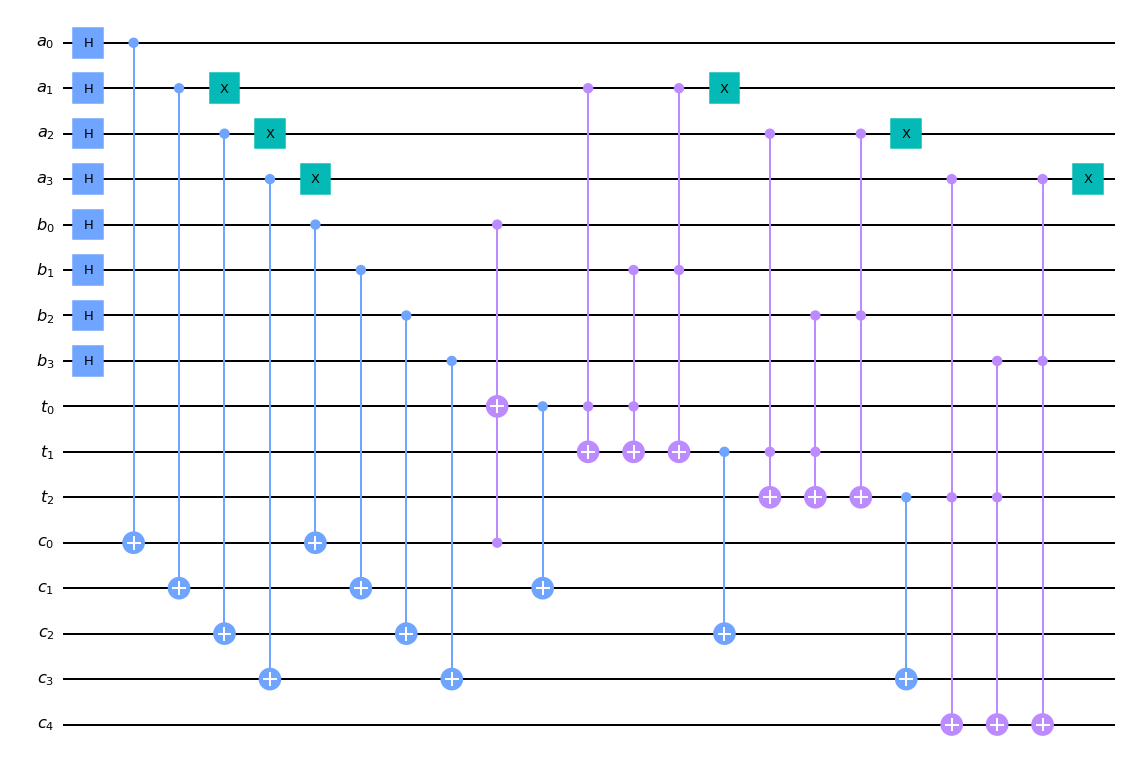

# of performed simultaneously operations is 256


[[0, 0.003906250000000005, '0000000000000000', '00000-000-0000-0000', '0=0-0'],
 [17,
  0.003906250000000002,
  '0000000000010001',
  '00000-000-0001-0001',
  '0=1-1'],
 [34,
  0.003906250000000002,
  '0000000000100010',
  '00000-000-0010-0010',
  '0=2-2'],
 [51,
  0.0039062499999999983,
  '0000000000110011',
  '00000-000-0011-0011',
  '0=3-3'],
 [68,
  0.003906250000000002,
  '0000000001000100',
  '00000-000-0100-0100',
  '0=4-4'],
 [85, 0.00390625, '0000000001010101', '00000-000-0101-0101', '0=5-5'],
 [102, 0.00390625, '0000000001100110', '00000-000-0110-0110', '0=6-6'],
 [119,
  0.0039062499999999965,
  '0000000001110111',
  '00000-000-0111-0111',
  '0=7-7'],
 [136,
  0.0039062500000000035,
  '0000000010001000',
  '00000-000-1000-1000',
  '0=8-8'],
 [153, 0.00390625, '0000000010011001', '00000-000-1001-1001', '0=9-9'],
 [170, 0.00390625, '0000000010101010', '00000-000-1010-1010', '0=10-10'],
 [187,
  0.0039062499999999965,
  '0000000010111011',
  '00000-000-1011-1011',
  '0=11-11'],

In [18]:
#Function for extracting addition operations from statevector
def extractsubt(sv,q,t):#sv:statevector, q: # of qubits, t:number of temporaries
    probs=[]
    
    for i in range(len(sv)):
        if not sv[i]==0:
            probs.append([i,abs(sv[i])**2])
    l=len(probs)
    for i in range(l):
        s=bin(probs[i][0])[2:]
        probs[i].append("0"*(3*q+t+1-len(s))+s)
        
    for i in range(l):
        s=probs[i][2]
        probs[i].append(s[:q+1]+"-"+s[q+1:t+q+1]+"-"+s[t+q+1:t+2*q+1]+"-"+s[2*q+t+1:3*q+t+1])
    for i in range(l):
        s=probs[i][3].split("-")
        c,b,a=int(s[0][1:],2),int(s[2][1:],2),int(s[3][1:],2)
        c,b,a=int(s[0],2),int(s[2],2),int(s[3],2)
        a=int(s[3],2)
        b=int(s[2],2)
        if s[0][0]=="0":
            c=int(s[0],2)
        else:
            c=-2**(q)+int(s[0][1:],2)
        probs[i].append((str(c)+"="+str(a)+"-"+str(b)).replace("--","+"))            
    return probs


a=QuantumRegister(4,"a")
b=QuantumRegister(4,"b")
t=QuantumRegister(3,"t")
c=QuantumRegister(5,"c")
qc=QuantumCircuit(a,b,t,c)
qc.h([i for i in range(8)])
multi_qubits_subtractor(qc,(0,1,2,3),(4,5,6,7),(8,9,10),(11,12,13,14,15))
display(qc.draw("mpl"))
sv=execute(qc,be).result().get_statevector()
n=extractsubt(sv,4,3)
print("# of performed simultaneously operations is",len(n))
n